# Develop Fan Chart Vis
Trying to produce a nice fan chart visualization to compare the magnitude of variability between systems, relative to the mean value in particular.

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
colors = {
    'CalCS': '#80b1d3',
    'HumCS': '#fb8072',
    'CanCS': '#fdb462',
    'BenCS': '#bc80bd'
}

# Analysis

In [52]:
EBU = 'BenCS'
VAR = 'FG_CO2'
fileDir = '/glade/p/work/rbrady/EBUS_BGC_Variability/' + VAR + '/' + EBU + '/filtered_output/'
ds_forced = xr.open_dataset(fileDir + EBU.lower() + '-' + VAR + '-forced-signal-AW-chavez-800km.nc')
ds_residuals = xr.open_dataset(fileDir + EBU.lower() + '-' + VAR + '-residuals-AW-chavez-800km.nc')

In [53]:
ds_total = ds_residuals + ds_forced

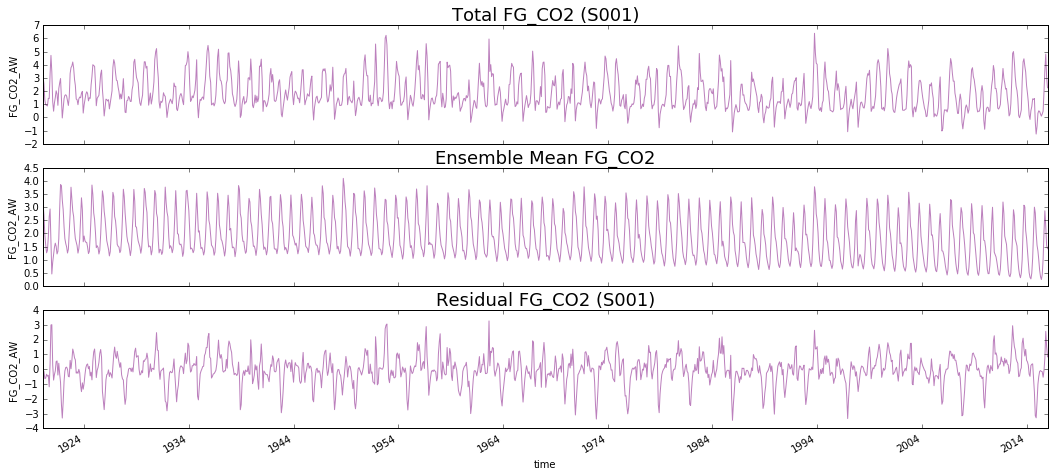

In [54]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(311)
ds_total['FG_CO2_AW'][0].plot(color=colors[EBU])
ax1.set_title('Total FG_CO2 (S001)', fontsize=18)
ax2 = fig.add_subplot(312)
ds_forced['FG_CO2_AW'].plot(color=colors[EBU])
ax2.set_title('Ensemble Mean FG_CO2', fontsize=18)
ax3 = fig.add_subplot(313)
ds_residuals['FG_CO2_AW'][0].plot(color=colors[EBU])
ax3.set_title('Residual FG_CO2 (S001)', fontsize=18)
plt.savefig(EBU + '-FG_CO2-timeseries-decomposition.png')